ELECTIVE 3 FINAL PIT
-
Amazon Books Reviews Dataset

Members:
Maelyn L. Obejero and Angel Llatuna

In [ ]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import re


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# 2. LOAD DATASET
df = pd.read_csv('Books_ratings.csv')

len(df)

29352

In [ ]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",07-Jul,4,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10-Oct,5,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10-Nov,5,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",07-Jul,4,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",03-Mar,4,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
# 3. LABEL CREATION (SENTIMENT)

# 1–2 = Negative, 3 = Neutral (optional), 4–5 = Positive


def label_sentiment(score):
  if score <= 2:
    return 'Negative'
  elif score == 3:
      return 'Neutral'
  else:
       return 'Positive'

df['sentiment'] = df['review/score'].apply(label_sentiment)

In [ ]:
# 4. TEXT PREPROCESSING
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
# Lowercase
  text = text.lower()
# Remove special characters
  text = re.sub(r'[^a-z\s]', '', text)
# Tokenization
  tokens = text.split()
# Stopword removal & Lemmatization
  tokens = [lemmatizer.lemmatize(word)
  for word in tokens if word not in stop_words]
  return ' '.join(tokens)


df['cleaned_review'] = df['review/text'].apply(preprocess_text)

In [ ]:
# 5. FEATURE EXTRACTION (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [ ]:
# 6. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 7. MODEL TRAINING
models = {
'Logistic Regression': LogisticRegression(max_iter=1000),
'SVM': LinearSVC(),
'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


results = {}


for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[name] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'report': classification_report(y_test, y_pred)
  }

In [ ]:
# 8. EVALUATION RESULTS

for model_name, metrics in results.items():
  print('=' * 60)
  print(model_name)
  print('Accuracy:', metrics['accuracy'])
  print(metrics['report'])

Logistic Regression
Accuracy: 0.8443195367058423
              precision    recall  f1-score   support

    Negative       0.71      0.42      0.52       676
     Neutral       0.48      0.09      0.15       475
    Positive       0.86      0.98      0.92      4720

    accuracy                           0.84      5871
   macro avg       0.68      0.49      0.53      5871
weighted avg       0.81      0.84      0.81      5871

SVM
Accuracy: 0.8378470447964571
              precision    recall  f1-score   support

    Negative       0.64      0.49      0.55       676
     Neutral       0.32      0.12      0.17       475
    Positive       0.88      0.96      0.92      4720

    accuracy                           0.84      5871
   macro avg       0.61      0.52      0.55      5871
weighted avg       0.80      0.84      0.81      5871

Random Forest
Accuracy: 0.824220746039857
              precision    recall  f1-score   support

    Negative       0.87      0.15      0.26       676
     

In [ ]:
model_accuracies = []
for name, metrics in results.items():
  model_accuracies.append({'Model': name, 'Accuracy': metrics['accuracy']})

accuracy_df = pd.DataFrame(model_accuracies)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

best_model_name = accuracy_df.iloc[0]['Model']
best_accuracy = accuracy_df.iloc[0]['Accuracy']

print("\n--- Model Performance Summary ---")
print(accuracy_df.to_string(index=False))
print(f"\nBased on accuracy, the best model is '{best_model_name}' with an accuracy of {best_accuracy:.3f}.")


--- Model Performance Summary ---
              Model  Accuracy
Logistic Regression  0.844320
                SVM  0.837847
      Random Forest  0.824221

Based on accuracy, the best model is 'Logistic Regression' with an accuracy of 0.844.


In [ ]:
# 9. PREDICTION FUNCTION (END-TO-END)
def predict_sentiment(review, model):
  clean_review = preprocess_text(review)
  vector = vectorizer.transform([clean_review])
  prediction = model.predict(vector)
  return prediction[0]


# Example
sample_review = "The book was not good and very boring"
best_model = models['Logistic Regression']
print('Review:', sample_review)
print('Predicted Sentiment:', predict_sentiment(sample_review, best_model))

Review: The book was not good and very boring
Predicted Sentiment: Negative


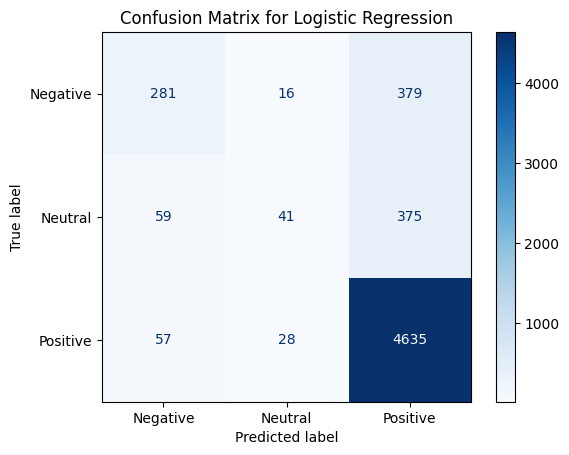

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model (Logistic Regression)
best_model = models['Logistic Regression']

# Predict labels for the test set
y_pred_best_model = best_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_model, labels=best_model.classes_)

# Get class names
class_names = best_model.classes_

# Create and display the Confusion Matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()